

> ** we can do analysis of any company from these model example wipro tatasteel**



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
data=pd.read_csv("NIFTY50_all.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366.0,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338.0,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121.0,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762.0,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470.0,2.875200e+14,NaN,816123.0,0.2741


In [ ]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
45476,2018-02-22,CIPLA,EQ,597.25,595.00,597.25,586.60,588.00,589.65,590.88,1859008.0,1.098452e+14,23547.0,1228424.0,0.6608
45477,2018-02-23,CIPLA,EQ,589.65,591.80,605.00,590.00,594.00,595.65,597.82,1576584.0,9.425211e+13,41664.0,546035.0,0.3463
45478,2018-02-26,CIPLA,EQ,595.65,596.25,598.30,588.75,589.50,590.10,592.66,1417465.0,8.400730e+13,30252.0,878418.0,0.6197
45479,2018-02-27,CIPLA,EQ,590.10,591.70,598.90,583.10,586.65,586.50,590.04,1349590.0,7.963055e+13,26690.0,603048.0,0.4468
45480,2018-02-28,CIPLA,EQ,586.50,590.00,596.60,587.10,591.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45481 entries, 0 to 45480
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                45481 non-null  object 
 1   Symbol              45481 non-null  object 
 2   Series              45481 non-null  object 
 3   Prev Close          45481 non-null  float64
 4   Open                45481 non-null  float64
 5   High                45481 non-null  float64
 6   Low                 45481 non-null  float64
 7   Last                45481 non-null  float64
 8   Close               45480 non-null  float64
 9   VWAP                45480 non-null  float64
 10  Volume              45480 non-null  float64
 11  Turnover            45480 non-null  float64
 12  Trades              23777 non-null  float64
 13  Deliverable Volume  42468 non-null  float64
 14  %Deliverble         42468 non-null  float64
dtypes: float64(12), object(3)
memory usage: 5.2+ MB


In [ ]:
data.shape

(45481, 15)

In [ ]:
df1=data.reset_index()['Close']
df1

0        962.90
1        893.90
2        884.20
3        921.55
4        969.30
          ...  
45476    589.65
45477    595.65
45478    590.10
45479    586.50
45480       NaN
Name: Close, Length: 45481, dtype: float64

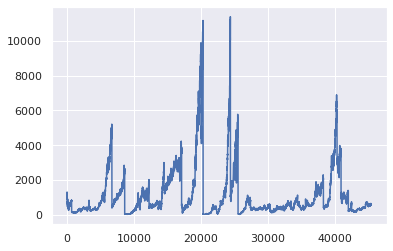

In [ ]:
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(45481, 1)

In [ ]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data,test_data = df1[0:train_size,:], df1[train_size:len(df1),:]

In [ ]:
train_size

29562

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape,y_train.shape)

(29461, 100) (29461,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=80,batch_size=64,verbose=1)

Epoch 1/80
461/461 [==============================] - 67s 136ms/step - loss: 8.5846e-04 - val_loss: 6.7753e-05
Epoch 2/80
461/461 [==============================] - 62s 134ms/step - loss: 3.3599e-04 - val_loss: 4.6333e-05
Epoch 3/80
461/461 [==============================] - 62s 133ms/step - loss: 2.3544e-04 - val_loss: 2.9270e-05
Epoch 4/80
461/461 [==============================] - 61s 133ms/step - loss: 2.0888e-04 - val_loss: 3.7860e-05
Epoch 5/80
461/461 [==============================] - 62s 133ms/step - loss: 1.6049e-04 - val_loss: 2.3771e-05
Epoch 6/80
461/461 [==============================] - 62s 134ms/step - loss: 1.5196e-04 - val_loss: 3.8056e-05
Epoch 7/80
461/461 [==============================] - 61s 133ms/step - loss: 1.4791e-04 - val_loss: 3.6381e-05
Epoch 8/80
461/461 [==============================] - 62s 134ms/step - loss: 1.3499e-04 - val_loss: 5.1692e-05
Epoch 9/80
461/461 [==============================] - 61s 133ms/step - loss: 1.3496e-04 - val_loss: 1.1109e-04
E

In [ ]:
# prediction 
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
# Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
# Calculate RMSE for Train Data
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

439.31486891671744

In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

486.67818964663644

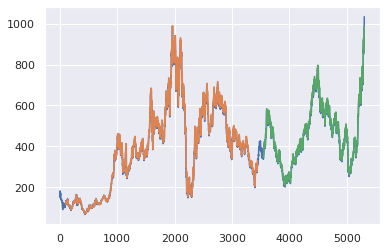

In [ ]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1858

In [ ]:
x_input=test_data[1758:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.99813855]
101
1 day input [0.57455392 0.56612361 0.56498578 0.56074476 0.56152056 0.57351952
 0.57874321 0.587639   0.59596587 0.58758728 0.58339798 0.54678045
 0.55246961 0.57320921 0.57414016 0.58484613 0.58438066 0.5929144
 0.59622446 0.59565555 0.64727179 0.63439359 0.63775537 0.67809672
 0.66811482 0.65001293 0.64923713 0.66397724 0.66108094 0.66061546
 0.62006724 0.6349625  0.64432377 0.62006724 0.59968968 0.60480993
 0.57796742 0.57558831 0.55210758 0.58841479 0.59415568 0.6060512
 0.6089475  0.63904836 0.657564   0.65368503 0.6444272  0.64903026
 0.63434187 0.62570468 0.65368503 0.65120248 0.65218516 0.62420481
 0.63853116 0.68482027 0.68316524 0.69888803 0.6701836  0.68595811
 0.69123351 0.73431601 0.71445565 0.68895785 0.6930437  0.6614947
 0.67985518 0.67514869 0.69216447 0.67938971 0.65906387 0.65952935
 0.68864753 0.69950866 0.69707784 0.65740884 0.67845875 0.72366175
 0.7579519  0.77020946 0.82317042 0.82803207 0.82296354 0.83537626
 0.8804241  0.86087406 0.81127489 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

5306

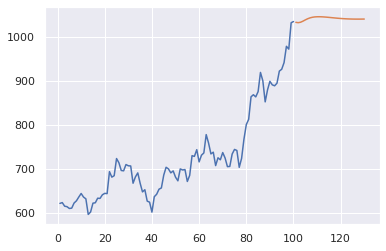

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[5206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

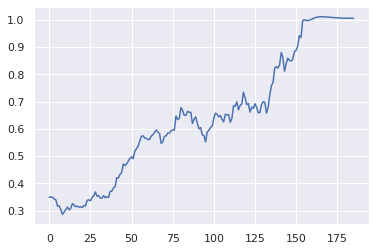

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5150:])

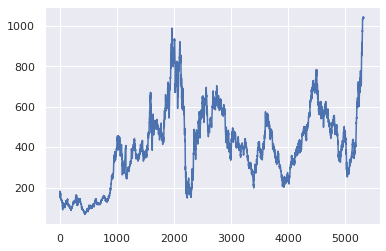

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)